In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.rcParams['figure.figsize'] = (12, 7)

In [2]:
df_anime = pd.read_pickle("data/anime.pickle")
df_users = pd.read_pickle("data/users.pickle")
genres = pd.read_pickle("data/MAL_genres.pickle")

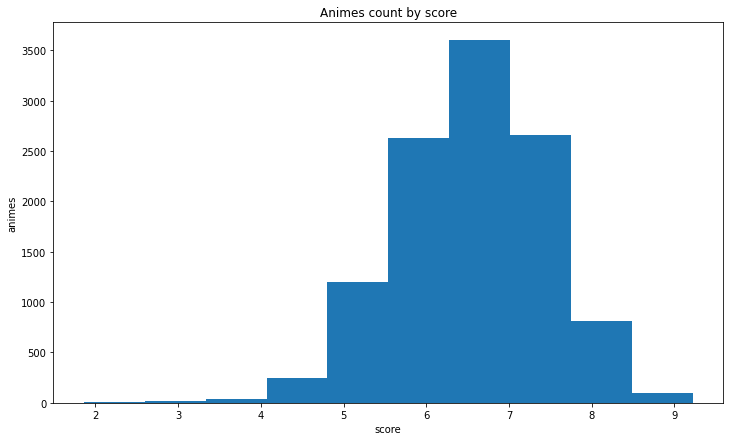

In [3]:
plt.hist(
    df_anime["score"]
)
plt.title("Animes count by score")
plt.xlabel("score")
plt.ylabel("animes")
plt.show()

In [31]:
# grouped = df_anime.set_index("aired_from").groupby(by=(lambda aired_from: aired_from.year))

df_anime["aired_from_year"] = df_anime["aired_from"].apply(lambda x: x.year)
df_anime_by_year = df_anime.set_index("aired_from_year")
df_anime_by_year.sort_index(inplace=True)
df_anime_by_year_grouped = df_anime_by_year.groupby(df_anime_by_year.index)

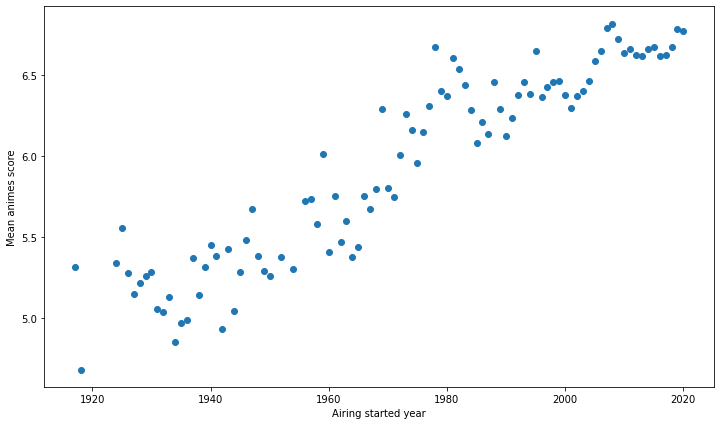

In [33]:
plt.scatter(
    df_anime_by_year_grouped.keys.unique(),
    df_anime_by_year_grouped.score.mean()
)
plt.xlabel("Airing started year")
plt.ylabel("Mean animes score")
plt.show()

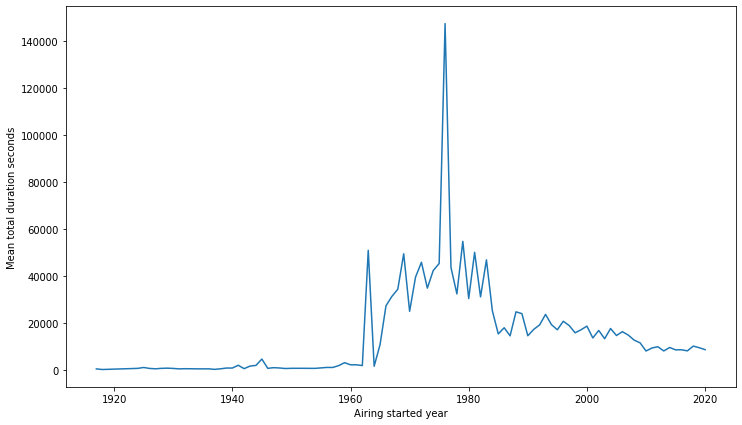

In [37]:
plt.plot(
    df_anime_by_year_grouped.keys.unique(),
    df_anime_by_year_grouped.total_duration_seconds.mean()
)
plt.xlabel("Airing started year")
plt.ylabel("Mean total duration seconds")
plt.show()

In [50]:
df_anime_by_type = df_anime.set_index("type")
df_anime_by_type.sort_index(inplace=True)
df_anime_by_type_grouped = df_anime_by_type.groupby(df_anime_by_type.index)

In [63]:
def show_boxplot_score_by_column(column_name, **kwargs):
    args = []
    labels = []
    for type_ in df_anime[column_name].unique():
        args.append(df_anime[df_anime[column_name] == type_]["score"])
        labels.append(type_)

    plt.boxplot(args, showfliers=True, labels=labels, **kwargs)
    plt.xticks(rotation=45)
    plt.show()

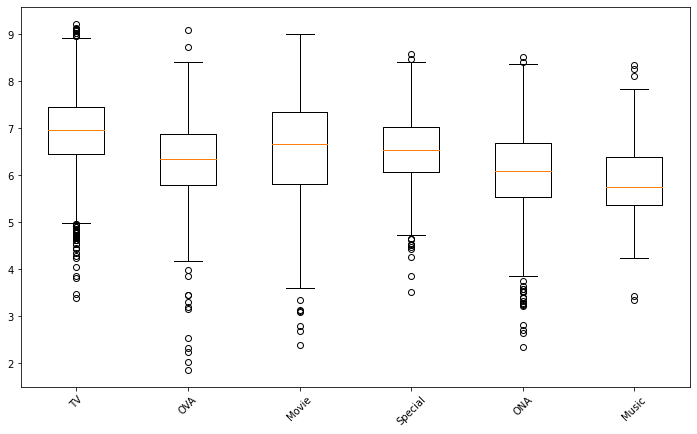

In [64]:
show_boxplot_score_by_column("type")

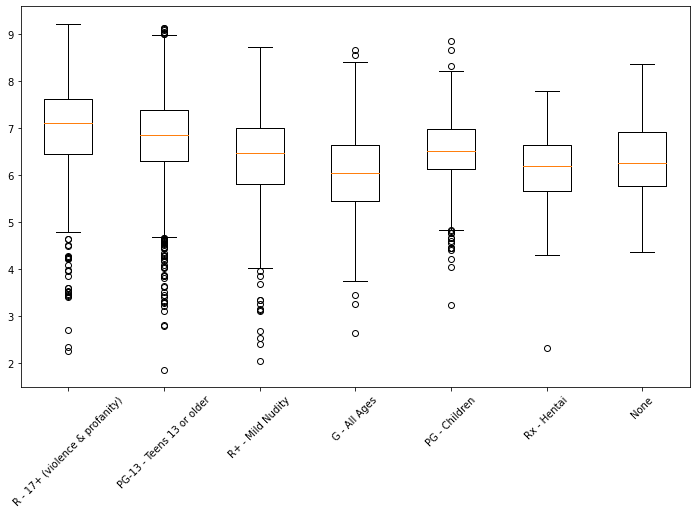

In [65]:
show_boxplot_score_by_column("rating")

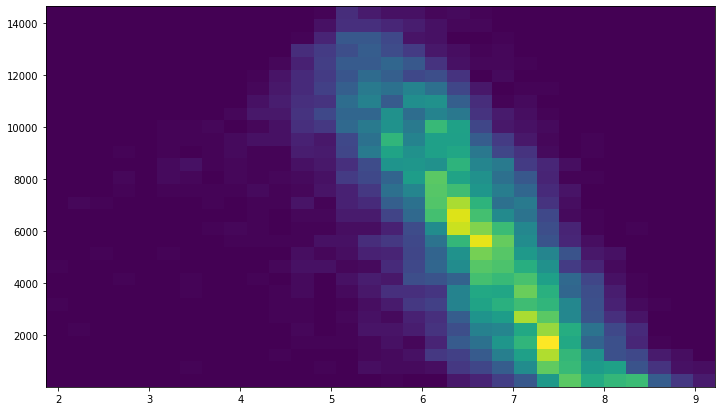

In [68]:
plt.hist2d(df_anime["score"], df_anime["popularity"], bins=30)
plt.show()